# initialize model

In [138]:
# from xgboost import XGBClassifier
# # read data
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# data = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)
# # create model instance
# bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# # fit model
# bst.fit(X_train, y_train)
# # make predictions
# preds = bst.predict(X_test)
import os

In [139]:
# path = os.getcwd()
# print("Current working directory:", path)

In [140]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [141]:
df = pd.read_csv('data.csv')
df.rename(columns={ df.columns[0]: "date" }, inplace = True)
# print(df.head())

# XGBoost

In [142]:
# train_end = '2018-12-31'
# val_end   = '2021-12-31'

# train = df[df['date'] <= train_end]
# val   = df[(df['date'] > train_end) & (df['date'] <= val_end)]
# test  = df[df['date'] > val_end]

# feature_cols_num = ['^VIX', '^GSPC', 'YieldCurveSlope', 'Unemployment', 'Inflation','GDP_Growth','Corporate_Leverage',]

In [143]:

# df = df.sort_values('date')

# Example: create some lag features
# max_lag = 5
# for lag in range(1, max_lag + 1):
#     df[f'spread_lag_{lag}'] = df.groupby('bond_id')['spread'].shift(lag)

# Target: next-day spread change
# df['target'] = df.groupby('bond_id')['spread'].shift(-1) - df['spread']

# Drop rows with NaNs due to lags / target
# df = df.dropna()

# # Train/val/test split by date
# train_end = '2018-12-31'
# val_end   = '2021-12-31'

# train = df[df['date'] <= train_end]
# val   = df[(df['date'] > train_end) & (df['date'] <= val_end)]
# test  = df[df['date'] > val_end]

# feature_cols_num = [
#     'spread', 'rf_2y', 'rf_10y', 'vix', 'cdx',
#     'maturity', 'duration', 'leverage',
# ] + [f'spread_lag_{lag}' for lag in range(1, max_lag + 1)]

# feature_cols_cat = ['rating', 'sector']

In [144]:
# train_end = '2018-12-31'
# val_end   = '2021-12-31'

# train = df[df['date'] <= train_end]
# val   = df[(df['date'] > train_end) & (df['date'] <= val_end)]
# test  = df[df['date'] > val_end]

# feature_cols_num = ['^VIX', '^GSPC', 'YieldCurveSlope', 'Unemployment', 'Inflation','GDP_Growth','Corporate_Leverage',]


# X_train = train[feature_cols_num]
# y_train = train['AAA_10Y_Spread']

# X_val = val[feature_cols_num]
# y_val = val['AAA_10Y_Spread']

# X_test = test[feature_cols_num]
# y_test = test['AAA_10Y_Spread']

# # Preprocess: one-hot for categorical
# preprocess = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', feature_cols_num),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), feature_cols_num)
#     ]
# )

# model = XGBRegressor(
#     n_estimators=500,
#     max_depth=6,
#     learning_rate=0.03,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective='reg:squarederror'
# )

# pipeline = Pipeline(steps=[
#     ('preprocess', preprocess),
#     ('model', model)
# ])

# pipeline.fit(X_train, y_train)

# pred_val = pipeline.predict(X_val)
# mae_val = mean_absolute_error(y_val, pred_val)
# print("Validation MAE:", mae_val)

/opt/anaconda3/envs/credit/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/credit/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/opt/anaconda3/envs/credit/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/credit/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


=== VALIDATION METRICS (change) ===
MAE                           : 0.0001
RMSE                          : 0.0001
MAPE (%)                      : 100.8851
SMAPE (%)                     : 196.4655
Median AE                     : 0.0000
R2                            : -0.0002
Explained Variance            : 0.0000
Mean Bias Error               : 0.0000
Correlation                   : nan
Directional Accuracy          : 0.4135
Precision (Spread Up)         : 0.4135
Recall (Spread Up)            : 1.0000
Big Move Hit Rate             : 0.8856
Residual Autocorrelation      : 0.9407
Strategy Sharpe               : 0.0263
Strategy CumPnL_Last          : 0.0005

=== TEST METRICS (change) ===
MAE                           : 0.0000
RMSE                          : 0.0000
MAPE (%)                      : 97.3588
SMAPE (%)                     : 193.7002
Median AE                     : 0.0000
R2                            : -0.0012
Explained Variance            : 0.0000
Mean Bias Error               

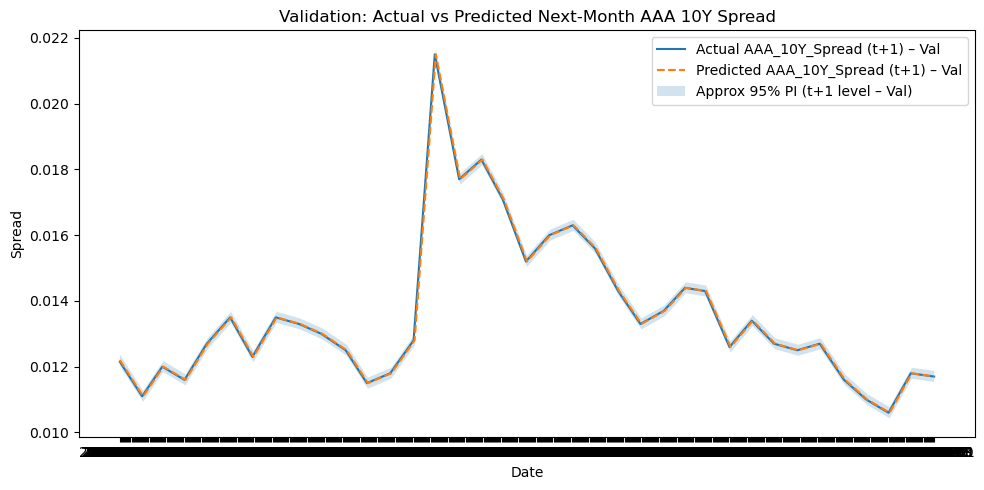

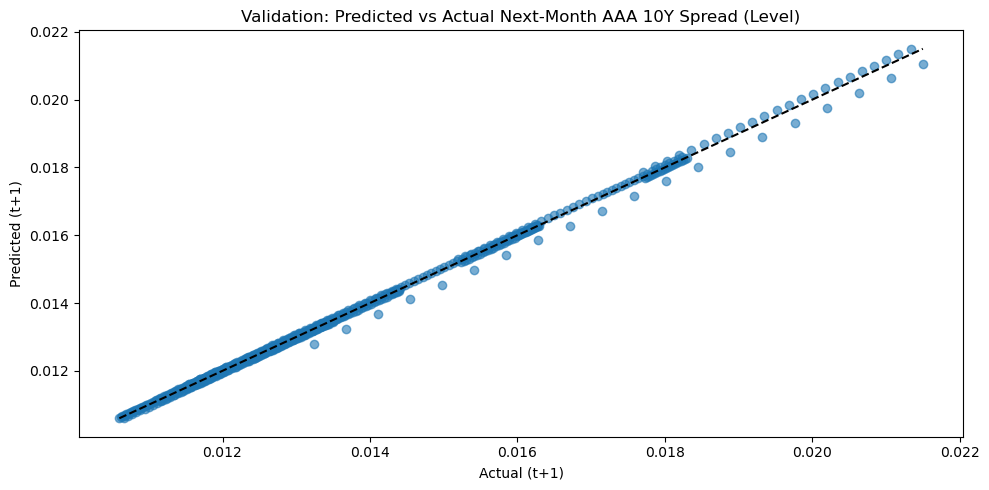

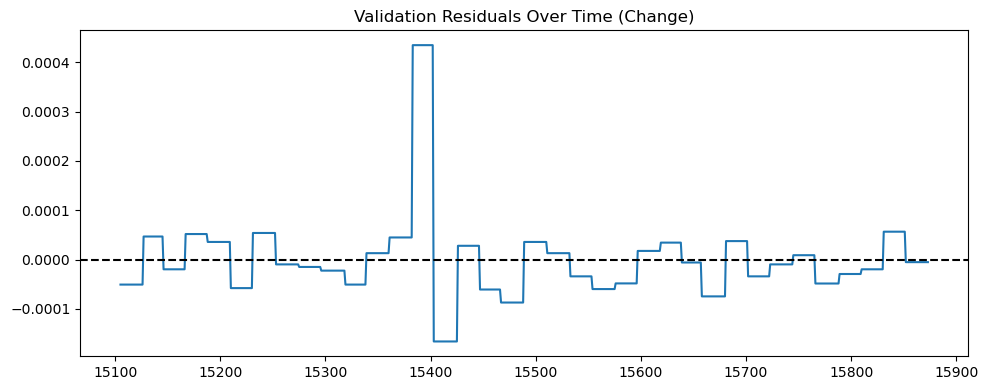

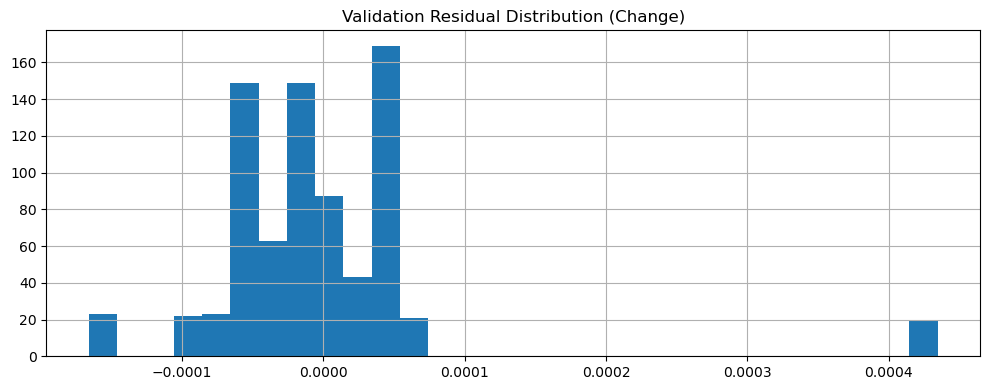

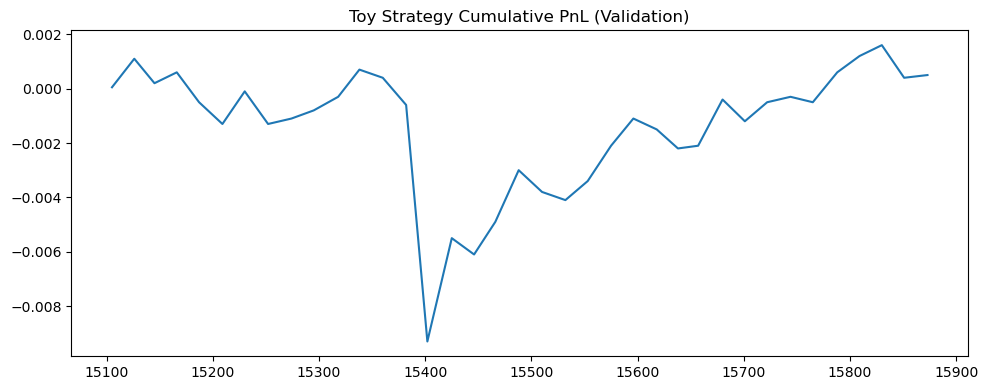


=== METRICS SCORECARD (DataFrame) ===
                 MAE      RMSE    MAPE (%)   SMAPE (%)  Median AE        R2  \
Validation  0.000050  0.000086  100.885147  196.465525   0.000036 -0.000206   
Test        0.000035  0.000046   97.358758  193.700229   0.000028 -0.001179   

            Explained Variance  Mean Bias Error  Correlation  \
Validation                 0.0         0.000001          NaN   
Test                       0.0         0.000002          NaN   

            Directional Accuracy  Precision (Spread Up)  Recall (Spread Up)  \
Validation              0.413524               0.413524                 1.0   
Test                    0.488349               0.488349                 1.0   

            Big Move Hit Rate  Residual Autocorrelation  Strategy Sharpe  \
Validation           0.885566                  0.940699         0.026258   
Test                 0.656535                  0.948251         0.075623   

            Strategy CumPnL_Last  
Validation                0.

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
    median_absolute_error
)

from xgboost import XGBRegressor

# =========================================================
# 0. PREPARE DATAFRAME: TARGET, RETURNS, LAGS
# =========================================================

# Ensure sorted by date
df = df.sort_values('date').copy()

# (Optional but recommended) restrict to more modern regime
df = df[df['date'] >= '1985-01-01'].copy()

# --- Transform some predictors to return/change form ---

# S&P 500 monthly return
df['GSPC_ret'] = df['^GSPC'].pct_change()

# VIX monthly change
df['VIX_change'] = df['^VIX'].diff()

# --- Target: next-month spread change (AAA) ---

# next-month level
df['AAA_10Y_Spread_next'] = df['AAA_10Y_Spread'].shift(-1)
# next-month change
df['AAA_10Y_Spread_change'] = df['AAA_10Y_Spread_next'] - df['AAA_10Y_Spread']

# --- Lag features ---

lag_cols = [
    'AAA_10Y_Spread_change',  # target dynamics
    'VIX_change',
    'GSPC_ret',
    'YieldCurveSlope',
    'Unemployment',
    'Inflation',
    'GDP_Growth',
    'Corporate_Leverage',
]

max_lag = 3

for col in lag_cols:
    for l in range(1, max_lag + 1):
        df[f'{col}_lag{l}'] = df[col].shift(l)

# --- CLEAN INF / -INF, THEN DROP NA ---  # <<< NEW
df.replace([np.inf, -np.inf], np.nan, inplace=True)  # <<< NEW
df = df.dropna().copy()

# =========================================================
# 1. Train / Val / Test Split
# =========================================================

train_end = '2018-12-31'
val_end   = '2021-12-31'

train = df[df['date'] <= train_end]
val   = df[(df['date'] > train_end) & (df['date'] <= val_end)]
test  = df[df['date'] > val_end]

# Base numeric features (changes/returns + levels)
base_features = [
    'VIX_change',
    'GSPC_ret',
    'YieldCurveSlope',
    'Unemployment',
    'Inflation',
    'GDP_Growth',
    'Corporate_Leverage',
]

lag_features = [f'{c}_lag{l}' for c in lag_cols for l in range(1, max_lag + 1)]

feature_cols_num = base_features + lag_features

# If you later add categorical vars, put them here (e.g. rating, sector)
feature_cols_cat = []  # e.g. ['rating', 'sector']

X_train = train[feature_cols_num]
X_val   = val[feature_cols_num]
X_test  = test[feature_cols_num]

# NOTE: target is the *change* in spread next month
y_train = train['AAA_10Y_Spread_change']
y_val   = val['AAA_10Y_Spread_change']
y_test  = test['AAA_10Y_Spread_change']

# Sanity check: no infs in any split           # <<< NEW (optional but useful)
assert np.isfinite(X_train.values).all(), "inf/-inf in X_train"  # <<< NEW
assert np.isfinite(X_val.values).all(), "inf/-inf in X_val"      # <<< NEW
assert np.isfinite(X_test.values).all(), "inf/-inf in X_test"    # <<< NEW

# =========================================================
# 2. Preprocess & XGBoost with Early Stopping
# =========================================================

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_cols_num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), feature_cols_cat),
    ],
    remainder='drop'
)

# Fit preprocessing on train only
preprocess.fit(X_train)

X_train_t = preprocess.transform(X_train)
X_val_t   = preprocess.transform(X_val)
X_test_t  = preprocess.transform(X_test)

xgb_model = XGBRegressor(
    n_estimators=2000,          # large, with early stopping
    max_depth=6,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=5,
    reg_lambda=2.0,
    reg_alpha=1.0,
    objective='reg:squarederror',
    random_state=42,
)

xgb_model.fit(
    X_train_t, y_train,
    eval_set=[(X_val_t, y_val)],
    # early_stopping_rounds=100,
    verbose=False
)

# =========================================================
# 3. Predictions (on CHANGE) + Level Reconstruction
# =========================================================

pred_val_change  = xgb_model.predict(X_val_t)
pred_test_change = xgb_model.predict(X_test_t)

# wrap as Series aligned to y_* index
pred_val_s_change  = pd.Series(pred_val_change, index=y_val.index, name='pred_val_change')
pred_test_s_change = pd.Series(pred_test_change, index=y_test.index, name='pred_test_change')

# Reconstruct predicted *next-month level* for plotting:
#   level_next_pred_t = level_t + predicted_change_t
actual_val_level_next  = val['AAA_10Y_Spread_next']
actual_test_level_next = test['AAA_10Y_Spread_next']

current_val_level  = val['AAA_10Y_Spread']
current_test_level = test['AAA_10Y_Spread']

pred_val_level_next  = current_val_level + pred_val_s_change
pred_test_level_next = current_test_level + pred_test_s_change

# =========================================================
# 4. Metrics Function (for CHANGE target)
# =========================================================

def compute_metrics(y_true: pd.Series, y_pred_s: pd.Series, freq_per_year=12):
    """
    Metrics for a change target (e.g., next-month spread change).

    y_true: actual changes
    y_pred_s: predicted changes (Series aligned to y_true.index)
    """
    y_pred = y_pred_s.values
    y_true_arr = y_true.values

    # Core errors (add epsilon to avoid division by 0 in MAPE)
    mae = mean_absolute_error(y_true_arr, y_pred)
    mse = mean_squared_error(y_true_arr, y_pred)
    rmse = np.sqrt(mse)
    denom = np.where(np.abs(y_true_arr) > 1e-6, np.abs(y_true_arr), 1e-6)
    mape = np.mean(np.abs((y_true_arr - y_pred) / denom)) * 100
    smape = 100 * np.mean(
        2 * np.abs(y_pred - y_true_arr) /
        (np.abs(y_true_arr) + np.abs(y_pred) + 1e-8)
    )

    # Regression stats
    medae = median_absolute_error(y_true_arr, y_pred)
    r2 = r2_score(y_true_arr, y_pred)
    evs = explained_variance_score(y_true_arr, y_pred)

    # Bias & correlation
    mbe = np.mean(y_pred - y_true_arr)
    corr = np.corrcoef(y_pred, y_true_arr)[0, 1]

    # Residuals as Series
    resid = pd.Series(y_true_arr - y_pred, index=y_pred_s.index)
    autocorr_resid = resid.autocorr(1)

    # Directional metrics (on the change itself)
    y_true_s = pd.Series(y_true_arr, index=y_pred_s.index)

    sign_true = np.sign(y_true_s)
    sign_pred = np.sign(y_pred_s)

    mask = (~sign_true.isna()) & (~sign_pred.isna())
    sign_true = sign_true[mask]
    sign_pred = sign_pred[mask]

    directional_accuracy = np.mean(sign_true == sign_pred)

    positive_mask = sign_pred > 0  # predicting spread widening
    precision_up = np.nan
    if positive_mask.any():
        precision_up = np.mean(sign_true[positive_mask] > 0)

    actual_up = sign_true > 0
    recall_up = np.nan
    if actual_up.any():
        recall_up = np.mean(sign_pred[actual_up] > 0)

    # Big move hit rate (large changes)
    threshold = y_true_s.std() * 0.75
    big_actual = np.abs(y_true_s) > threshold
    big_pred   = np.abs(y_pred_s) > threshold
    bm_mask = (~big_actual.isna()) & (~big_pred.isna())
    big_actual = big_actual[bm_mask]
    big_pred   = big_pred[bm_mask]
    big_move_hit_rate = np.mean(big_actual == big_pred)

    # Toy backtest:
    #   if model predicts spread will FALL (pred < 0) → go LONG credit.
    #   PnL ∝ - sign(pred) * actual_change
    strat_ret = -np.sign(y_pred_s) * y_true_s
    strat_ret = strat_ret.dropna()

    if strat_ret.std() > 0:
        sharpe = np.sqrt(freq_per_year) * strat_ret.mean() / strat_ret.std()
    else:
        sharpe = np.nan

    cum_pnl = strat_ret.cumsum()

    metrics = {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape,
        "SMAPE (%)": smape,
        "Median AE": medae,
        "R2": r2,
        "Explained Variance": evs,
        "Mean Bias Error": mbe,
        "Correlation": corr,
        "Directional Accuracy": directional_accuracy,
        "Precision (Spread Up)": precision_up,
        "Recall (Spread Up)": recall_up,
        "Big Move Hit Rate": big_move_hit_rate,
        "Residual Autocorrelation": autocorr_resid,
        "Strategy Sharpe": sharpe,
        "Strategy CumPnL_Last": cum_pnl.iloc[-1] if len(cum_pnl) > 0 else np.nan,
    }

    return metrics, resid, strat_ret, cum_pnl

# =========================================================
# 5. Compute Metrics (Val + Test) on CHANGE
# =========================================================

metrics_val, resid_val, strat_ret_val, cum_pnl_val = compute_metrics(
    y_val, pred_val_s_change
)
metrics_test, resid_test, strat_ret_test, cum_pnl_test = compute_metrics(
    y_test, pred_test_s_change
)

print("=== VALIDATION METRICS (change) ===")
for k, v in metrics_val.items():
    print(f"{k:30s}: {v:.4f}")

print("\n=== TEST METRICS (change) ===")
for k, v in metrics_test.items():
    print(f"{k:30s}: {v:.4f}")

# =========================================================
# 6. Simple Prediction Intervals (on CHANGE) + convert to LEVEL
# =========================================================

sigma_resid = resid_val.std()
z = 1.96  # ~95% interval

val_pi_lower_change = pred_val_s_change - z * sigma_resid
val_pi_upper_change = pred_val_s_change + z * sigma_resid

test_pi_lower_change = pred_test_s_change - z * sigma_resid
test_pi_upper_change = pred_test_s_change + z * sigma_resid

# Convert change-PIs to level-PIs for next-month level:
val_pi_lower_level = current_val_level + val_pi_lower_change
val_pi_upper_level = current_val_level + val_pi_upper_change

test_pi_lower_level = current_test_level + test_pi_lower_change
test_pi_upper_level = current_test_level + test_pi_upper_change

# =========================================================
# 7. Matplotlib Performance Report (LEVEL)
# =========================================================

# Validation: actual vs predicted next-month level
plt.figure(figsize=(10, 5))
plt.plot(val['date'], actual_val_level_next, label='Actual AAA_10Y_Spread (t+1) – Val')
plt.plot(val['date'], pred_val_level_next, label='Predicted AAA_10Y_Spread (t+1) – Val', linestyle='--')
plt.fill_between(
    val['date'],
    val_pi_lower_level,
    val_pi_upper_level,
    alpha=0.2,
    label='Approx 95% PI (t+1 level – Val)'
)
plt.title('Validation: Actual vs Predicted Next-Month AAA 10Y Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.tight_layout()
plt.show()

# Validation: scatter on next-month level
plt.figure(figsize=(10, 5))
plt.scatter(actual_val_level_next, pred_val_level_next, alpha=0.6)
min_v = min(actual_val_level_next.min(), pred_val_level_next.min())
max_v = max(actual_val_level_next.max(), pred_val_level_next.max())
plt.plot([min_v, max_v], [min_v, max_v], 'k--')
plt.title('Validation: Predicted vs Actual Next-Month AAA 10Y Spread (Level)')
plt.xlabel('Actual (t+1)')
plt.ylabel('Predicted (t+1)')
plt.tight_layout()
plt.show()

# Residual diagnostics (on change)
plt.figure(figsize=(10, 4))
resid_val.plot()
plt.axhline(0, color='k', linestyle='--')
plt.title('Validation Residuals Over Time (Change)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
resid_val.hist(bins=30)
plt.title('Validation Residual Distribution (Change)')
plt.tight_layout()
plt.show()

# Toy strategy PnL
plt.figure(figsize=(10, 4))
cum_pnl_val.plot()
plt.title('Toy Strategy Cumulative PnL (Validation)')
plt.tight_layout()
plt.show()

# =========================================================
# 8. Scorecard as DataFrame + LaTeX Table
# =========================================================

metrics_df = pd.DataFrame(
    [metrics_val, metrics_test],
    index=['Validation', 'Test']
)

print("\n=== METRICS SCORECARD (DataFrame) ===")
print(metrics_df)

latex_table = metrics_df.to_latex(
    float_format="%.4f",
    index=True,
    caption="Model performance metrics for next-month AAA 10Y spread change forecasting",
    label="tab:aaa_spread_change_metrics"
)

print("\n=== LaTeX TABLE ===")
print(latex_table)
